**Visualization**

In [ ]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Data/lyrics.csv")
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)


nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def count_words(df):
    word_count = Counter()
    for index, row in df.iterrows():
        lyrics = row["lyrics"].lower() 
        words = lyrics.split() 
        words = [w for w in words if w.isalpha()] 
        words = [w for w in words if w not in stop_words]
        words = [nltk.PorterStemmer().stem(w) for w in words]
        word_count.update(words) 
    return word_count   


In [ ]:
word_count = count_words(df)
for word in ['nigga', 'bitch', 'fuck']:
    if word in word_count:
        word_count[word.replace(word, word[0] + '*'*(len(word)-2) + word[-1])] = word_count.pop(word)
print(len(word_count))
print(word_count.most_common(25))

13372
[('like', 2244), ('got', 1857), ('get', 1442), ('n***a', 1415), ('know', 1330), ('f**k', 969), ('b***h', 918), ('go', 788), ('love', 725), ('want', 699), ('shit', 690), ('make', 681), ('yeah', 638), ('back', 584), ('might', 580), ('see', 573), ('one', 527), ('wanna', 504), ('say', 491), ('take', 465), ('need', 465), ('never', 457), ('come', 435), ('look', 431), ('let', 416)]


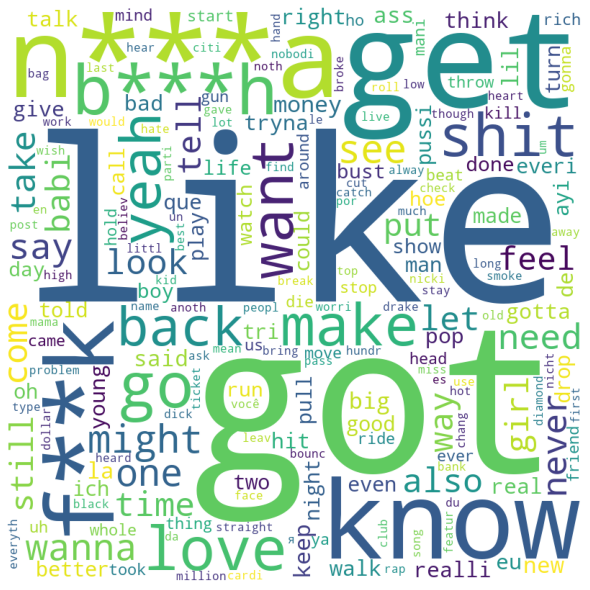

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=800,
                background_color='white',
                min_font_size=10).generate_from_frequencies(word_count)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

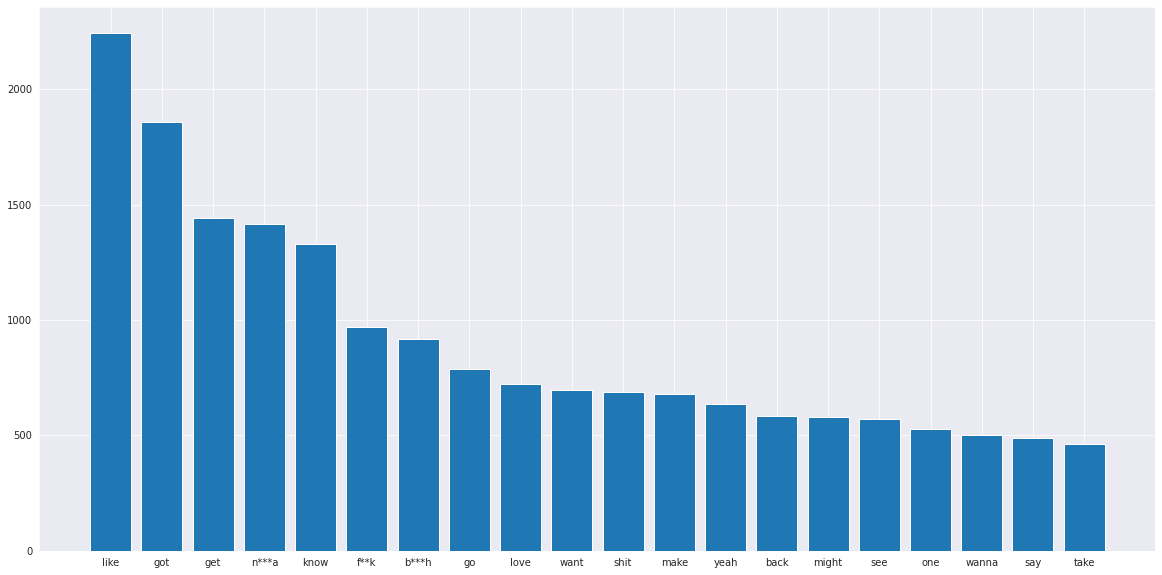

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
plt.bar(*zip(*word_count.most_common(20)))
plt.show()